In [218]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [219]:
df = pd.read_csv('train.csv')

In [220]:
#assign value to blank lines
df['mileage'] = df['mileage'].fillna(0)

In [221]:
#contar linhas kmkg
linhas_kmkg_rows = (df['mileage'].str.contains('km/kg')).sum()
print(linhas_kmkg_rows)

121


In [222]:
df = df[df['mileage'].notna()]
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+\.\d+|\d+)', str(i))  # Encontrar números (com ou sem ponto decimal)
    
    if match:
        valor = float(match.group())
        
        if 'km/kg' in str(i):
            valor *= 1.40  # Converter de km/kg para kmpl
        
        consumo_correto.append(valor)

df['mileage'] = consumo_correto

In [223]:
value_at_row_119 = df.at[118, 'mileage']
print(value_at_row_119)

42.672


In [224]:
#CORRELAÇÃO

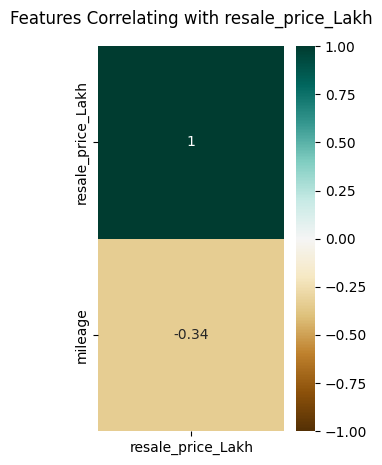

In [225]:
# Select columns
columns_of_interest = ['mileage', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()